In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached yfinance-0.2.52-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.6-py312-none-any.whl.metadata (23 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.52-py2.py3-none-any.whl (108 kB)
Using cached frozendict-2.4.6-py312-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install fastapi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install uvicorn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf
import pandas as pd

# Fetch historical stock data (e.g., Apple)
stock_data = yf.download("AAPL", start="2010-01-01", end="2023-01-01")

# Show first 5 rows of data
print(stock_data.head())

# Save data to a CSV (optional)
stock_data.to_csv("AAPL_stock_data.csv")


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.447412  6.462174  6.398306  6.429939  493729600
2010-01-05  6.458559  6.495012  6.424515  6.465187  601904800
2010-01-06  6.355827  6.484167  6.349199  6.458559  552160000
2010-01-07  6.344075  6.386856  6.297982  6.379324  477131200
2010-01-08  6.386255  6.386858  6.298286  6.335642  447610800


In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract Close prices
data = stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Convert the data into sequences for LSTM (using the last 60 days to predict next day)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshaping for LSTM

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (2568, 60, 1), Test data shape: (643, 60, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")


C:\Users\Tejas Krishna\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0033
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.8945e-04
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.8515e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.7194e-04
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.1440e-04
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.1185e-04
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.8995e-04
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.8841e-04
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.6244e-04
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 1.7682e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020
Test loss: 0.0024971403181552887


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


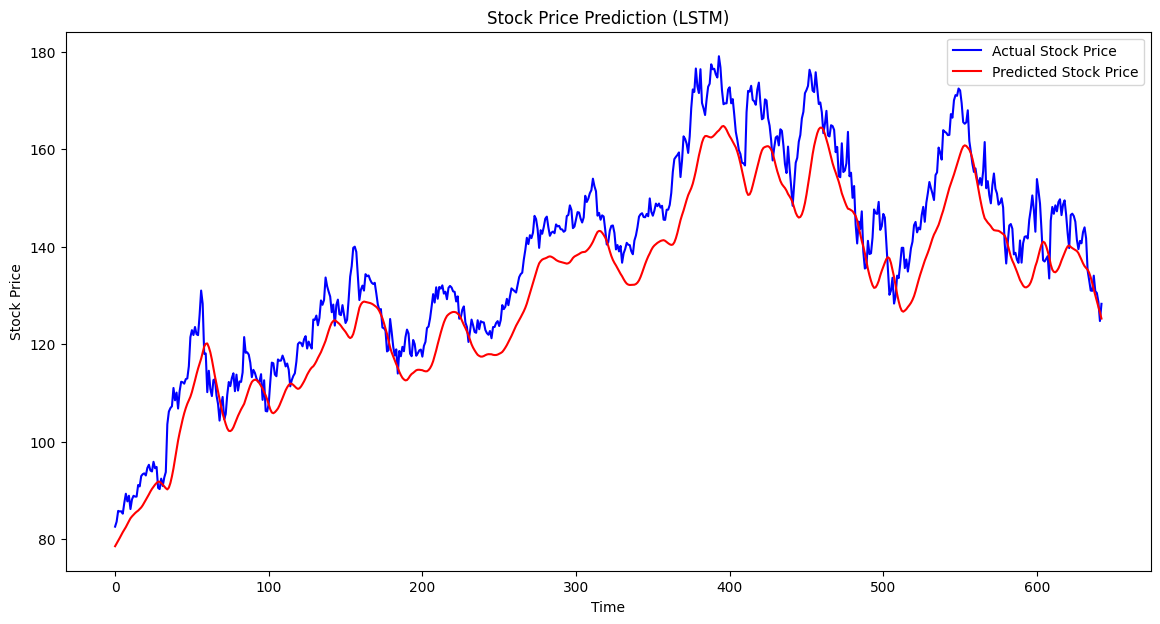

In [14]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Predict on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse scaling of actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values (Matplotlib)
plt.figure(figsize=(14,7))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title("Stock Price Prediction (LSTM)")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot using Plotly (for interactive visualization)
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test_actual)), y=y_test_actual.flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(predictions)), y=predictions.flatten(), mode='lines', name='Predicted'))
fig.update_layout(title="Stock Price Prediction (LSTM)", xaxis_title="Time", yaxis_title="Stock Price")
fig.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split

# Download stock data
df = yf.download("AAPL", start="2010-01-01", end="2023-01-01")

# Calculate the daily returns and add target column
df['Return'] = df['Close'].pct_change()  # daily percentage change
df['Target'] = (df['Return'] > 0).astype(int)  # 1 for positive return, 0 for negative

# Create features (lags of returns)
df['Lag1'] = df['Return'].shift(1)
df['Lag2'] = df['Return'].shift(2)
df = df.dropna()  # Drop NaN values

# Prepare data for classification
X = df[['Lag1', 'Lag2']]  # Features
y = df['Target']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


[*********************100%***********************]  1 of 1 completed


Accuracy: 0.5168195718654435


[*********************100%***********************]  1 of 1 completed


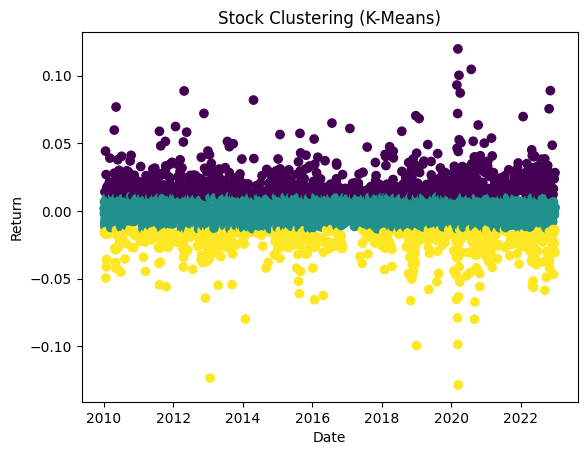

In [29]:
from sklearn.cluster import KMeans
import yfinance as yf
import pandas as pd

# Download historical data
df = yf.download("AAPL", start="2010-01-01", end="2023-01-01")

# Calculate daily returns
df['Return'] = df['Close'].pct_change()
df = df.dropna()  # Drop NaN values

# Prepare data for clustering (e.g., using daily returns)
returns_data = df[['Return']]

# Initialize and train the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: positive, negative, and neutral trend
df['Cluster'] = kmeans.fit_predict(returns_data)

# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df.index, df['Return'], c=df['Cluster'], cmap='viridis')
plt.title("Stock Clustering (K-Means)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()


In [32]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import yfinance as yf
import pandas as pd

# Fetch news data (this would be replaced with real news API)
# For simplicity, we’ll use random headlines (in real case, scrape news websites or use a news API)
headlines = ["Stock market surges as tech stocks rise", "Stock prices crash amid market uncertainty"]

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment of each headline
sentiments = [analyzer.polarity_scores(headline) for headline in headlines]

# Create DataFrame of results
sentiment_df = pd.DataFrame(sentiments)
print(sentiment_df)


    neg   neu  pos  compound
0  0.00  1.00  0.0    0.0000
1  0.56  0.44  0.0   -0.6249


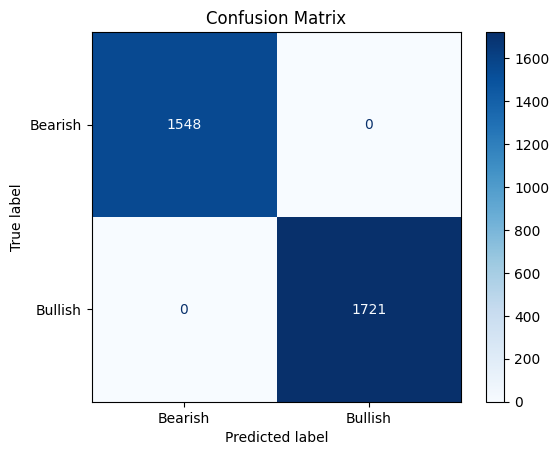

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train a model (using the RandomForest example above)
y_pred = model.predict(X)

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bearish', 'Bullish'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


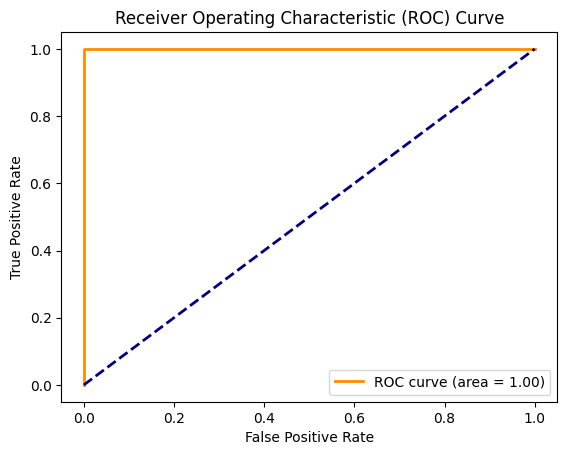

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


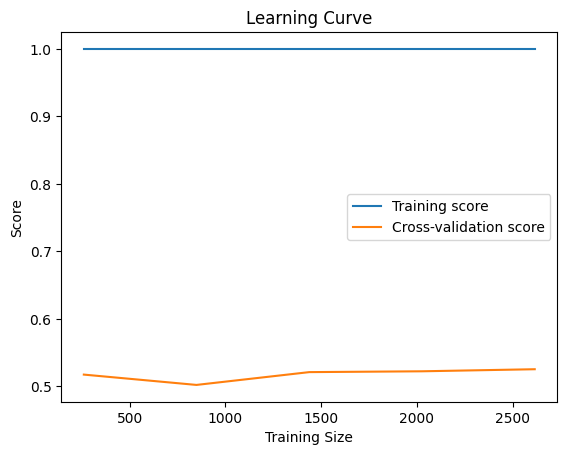

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Get the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


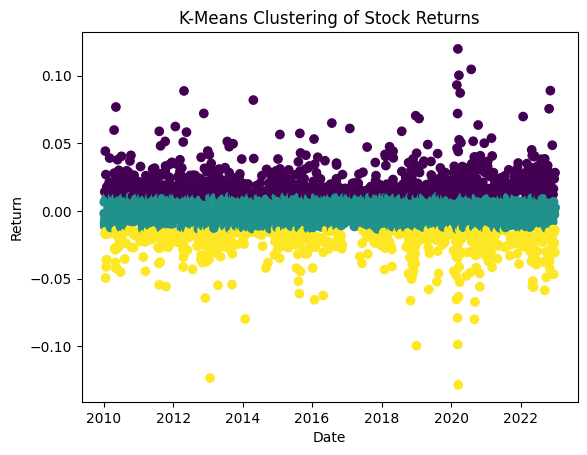

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a toy dataset for clustering
data = df[['Return']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(data)

# Plot the clusters
plt.scatter(df.index, df['Return'], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clustering of Stock Returns")
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()


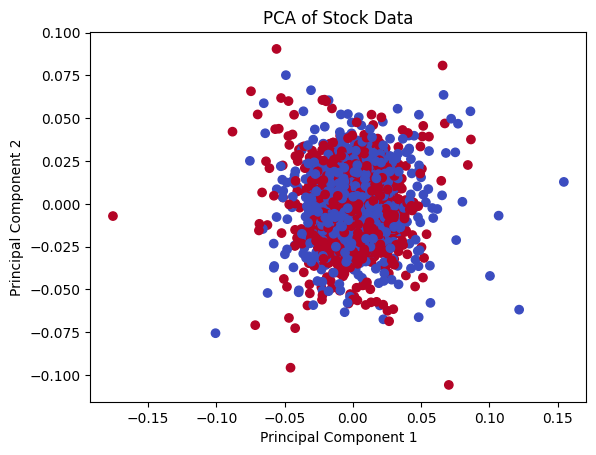

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Plot the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y, cmap='coolwarm')
plt.title('PCA of Stock Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


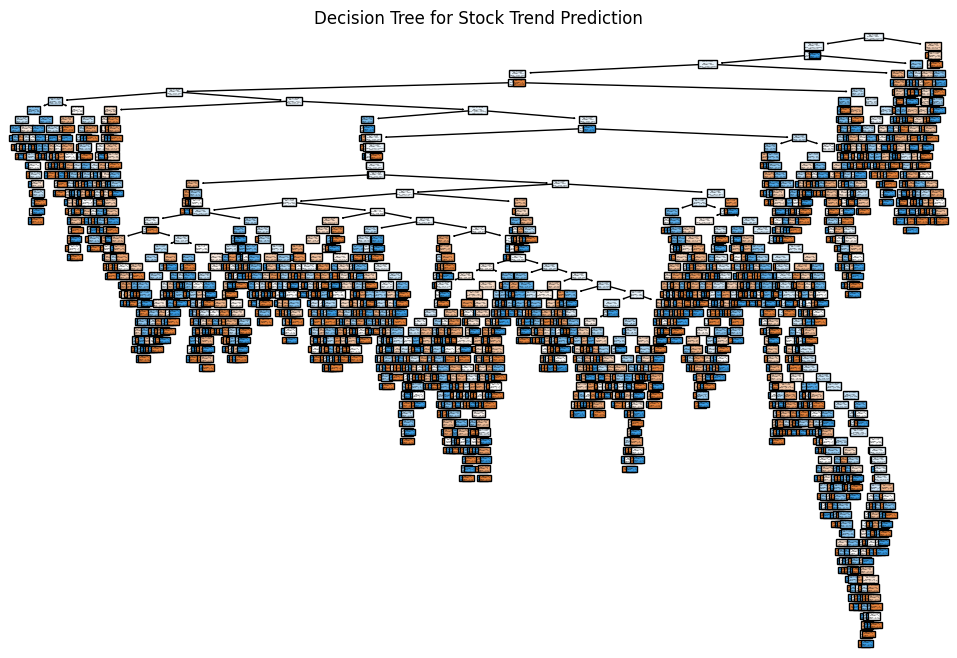

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=['Lag1', 'Lag2'], class_names=['Bearish', 'Bullish'])
plt.title('Decision Tree for Stock Trend Prediction')
plt.show()
